In [ ]:
#only if you want to run it in Google Colab:

!pip install --upgrade pycaret[full]

## Importing the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics



from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

## Reading the CSV File

In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd gdrive/My Drive/No Show Analysis

# uncomment and run the following lines in case Google Colab is being used
# from google.colab import drive
# drive.mount("/gdrive")
# %cd /gdrive/My Drive/Project 4 - Bank Churn Prediction

Mounted at gdrive
/content/gdrive/My Drive/No Show Analysis


In [ ]:
ptdata = pd.read_csv("ptdata2.csv")

## Overview of the Dataset


In [ ]:
ptdata.shape

(78418, 19)

In [ ]:
ptdata.apt_createdby.nunique()

29

In [ ]:
ptdata.tail(15)

,acct_no,age,gender,reg_date,insurance,patient_city,practice,facility,is_televisit,apt_createdby,apt_date,visit_type,visit_status,apt_provider,insurance.1,patient_email,txt_enabled,voice_enabled,web_enabled
78403,1304957,32,MALE,12/8/2023,Self-Pay,Fort Worth,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/20/2023,New Pt : New Patient,VISITED,Zora Ross,Self-Pay,1,1,1,1
78404,1304967,61,MALE,12/8/2023,CIGNA HEALTH,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/14/2023,New Pt : New Patient,VISITED,Jack Glover,CIGNA HEALTH,1,1,1,1
78405,1304982,24,FEMALE,12/10/2023,UNITED HEALTHCARE BENEFITS OF TEXAS,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/28/2023,ESTPT : Established Patient,VISITED,Zora Ross,UNITED HEALTHCARE BENEFITS OF TEXAS,1,1,1,1
78406,1304982,24,FEMALE,12/10/2023,UNITED HEALTHCARE BENEFITS OF TEXAS,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/18/2023,HOSP F/U : Hospital Follow up,VISITED,Zora Ross,UNITED HEALTHCARE BENEFITS OF TEXAS,1,1,1,1
78407,1305128,34,MALE,12/14/2023,BCBS TX,JOSHUA,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/18/2023,New Pt : New Patient,VISITED,Kellen Mayer,BCBS TX,1,1,1,1
78408,1305130,68,FEMALE,12/14/2023,UHC MCR ADVANTAGE HMO,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/14/2023,New Pt : New Patient,VISITED,Zora Ross,UHC MCR ADVANTAGE HMO,0,1,1,0
78409,1305130,68,FEMALE,12/14/2023,UHC MCR ADVANTAGE HMO,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/20/2023,ESTPT : Established Patient,VISITED,Zora Ross,UHC MCR ADVANTAGE HMO,0,1,1,0
78410,1305172,47,FEMALE,12/18/2023,UHC,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,12/28/2023,HOSP F/U : Hospital Follow up,VISITED,Zora Ross,UHC,1,1,1,1
78411,1305193,35,FEMALE,12/18/2023,MCTL,HOUSTON,ZEBKARLG109478,ZEBRA MAIN MEDICAL CENTER,0,Robin Yang,12/18/2023,TP CLINIC,VISITED,Oliver Moore,MEDICAL CITY TRANSPLANT INSTITUTE,1,0,1,1
78412,1305195,72,MALE,12/18/2023,MCTL,MONAHANS,ZEBKARLG109478,ZEBRA MAIN MEDICAL CENTER,0,Robin Yang,12/19/2023,TP CLINIC,VISITED,Oliver Moore,MEDICAL CITY TRANSPLANT INSTITUTE,0,0,1,0


In [ ]:
# Find missing values in this patient data Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = ptdata.isnull().sum()
print(missing)

acct_no          0
age              0
gender           0
reg_date         0
insurance        0
patient_city     2
practice         0
facility         0
is_televisit     0
apt_createdby    0
apt_date         0
visit_type       0
visit_status     0
apt_provider     0
insurance.1      0
patient_email    0
txt_enabled      0
voice_enabled    0
web_enabled      0
dtype: int64


## Data Preparation

In [ ]:
ptdata['apt_date'] = pd.to_datetime(ptdata['apt_date'])
ptdata['reg_date'] = pd.to_datetime(ptdata['reg_date'])
#ptdata['pos'] = dfencounter['pos'].astype(str)
#ptdata['apt_date'] = pd.to_datetime(ptdata['apt_date']).dt.strftime('%m/%d/%Y')

In [ ]:
ptdata['acct_no'] = ptdata['acct_no'].astype('category')
ptdata['apt_date'] = ptdata['apt_date'].astype('category')
ptdata['reg_date'] = ptdata['reg_date'].astype('category')

In [ ]:
print(ptdata['apt_date'].dtype)


category


In [ ]:
ptdata['insurance'] = ptdata['insurance'].replace({None: 'Self-Pay'})
ptdata['apt_createdby'] = ptdata['apt_createdby'].replace({None: 'System'})
ptdata['patient_city'] = ptdata['patient_city'].replace({None: 'Fort Worth'})
ptdata['visit_status'] = ptdata['visit_status'].replace({'VISITED': '1'})
ptdata['visit_status'] = ptdata['visit_status'].replace({'NO SHOW': '0'})



In [ ]:
ptdata['visit_status'] = ptdata['visit_status'].astype('int')

In [ ]:
# Find missing values in this patient data Set
#Find whether any data is missing using .isnull functi
#Sum for each columns using .sum()
missing = ptdata.isnull().sum()
print(missing)

acct_no          0
age              0
gender           0
reg_date         0
insurance        0
patient_city     0
practice         0
facility         0
is_televisit     0
apt_createdby    0
apt_date         0
visit_type       0
visit_status     0
apt_provider     0
insurance.1      0
patient_email    0
txt_enabled      0
voice_enabled    0
web_enabled      0
dtype: int64


In [ ]:
ptdata['patient_city'] = ptdata['patient_city'].str.upper()

In [ ]:
#for column in ptdata.columns:
#    unique_values = ptdata[column].unique()
#    print(f"Column '{column}' has unique values: {unique_values}")

In [ ]:
ptdata.shape

(78418, 19)

In [ ]:
ptdata.dtypes

,0
acct_no,category
age,int64
gender,object
reg_date,category
insurance,object
patient_city,object
practice,object
facility,object
is_televisit,int64
apt_createdby,object


## EDA Functions
**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
#TOP 10 - BAR PLOT
def top_10_bar_plot(df, column_name,display_name):
       # Count occurrences of each value in the column
    value_counts = df[column_name].value_counts().head(10)

    # Plotting the top 10 occurrences with different colors and a bigger size
    plt.figure(figsize=(14, 6))
    bars = value_counts.plot(kind='bar', color=plt.cm.Paired(range(len(value_counts))))

    # Adding totals on top of each bar
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center', size=12, xytext=(0, 8),
                      textcoords='offset points')

    plt.title(f'Top 10 Occurrences in {display_name}')
    plt.xlabel(display_name)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
def top_10_bar_plot_percent(df, column_name,display_name):
       # Count occurrences of each value in the column
    # Count occurrences of each value in the column
    value_counts = df[column_name].value_counts(normalize=True).head(10) * 100  # Convert to percentage

    # Plotting the top 10 occurrences with different colors and a bigger size
    plt.figure(figsize=(12, 6))
    bars = value_counts.plot(kind='bar', color=plt.cm.Paired(range(len(value_counts))))

    # Adding percentages on top of each bar
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.2f') + '%',
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='center', size=12, xytext=(0, 8),
                      textcoords='offset points')

    plt.title(f'Top 10 Occurrences in {display_name}')
    plt.xlabel(display_name)
    plt.ylabel('Percentage')
    plt.show()

In [ ]:
# Assuming 'ptdata' is your DataFrame
# Extract day of the week from 'apt_date'
ptdata['day_of_week'] = ptdata['apt_date'].dt.day_name()

## Univariate Analysis

### Age Distribution

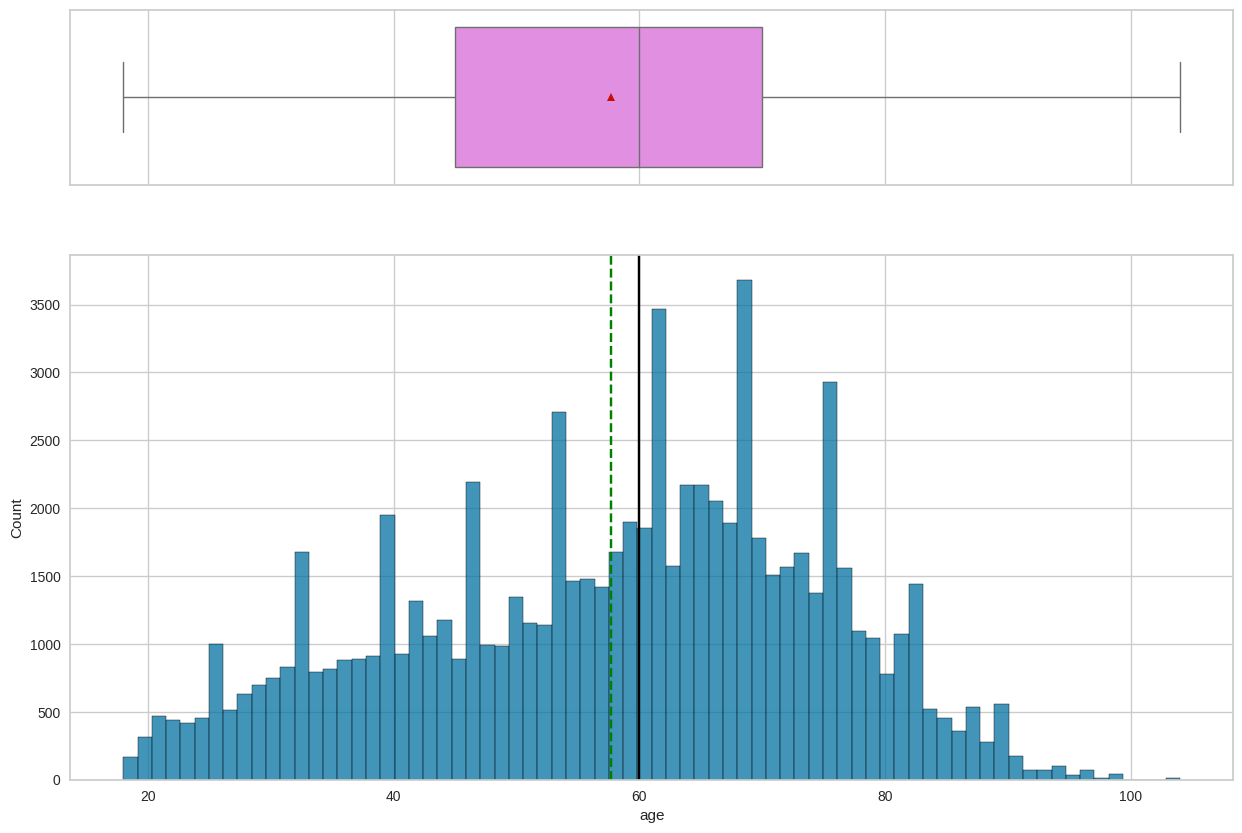

In [ ]:
histogram_boxplot(ptdata, "age")

* The `age` distribution looks right skewed with a mean temperature around 300K.
* There is no outlier present.

### Patient No Show vs Confirmed

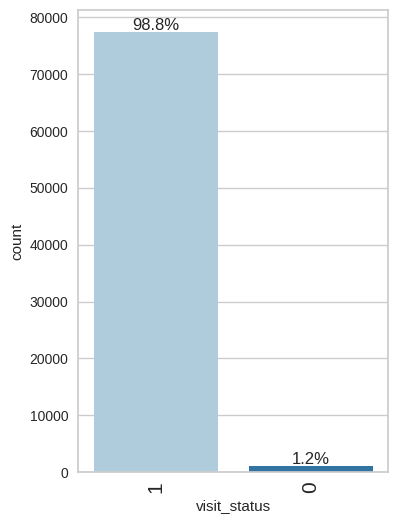

In [ ]:
labeled_barplot(ptdata, "visit_status", perc=True)

* In this dataset, there almost 1.3% of scheduled patient either Cancelled or No Show for their appointment.

### Male vs Female Appointments

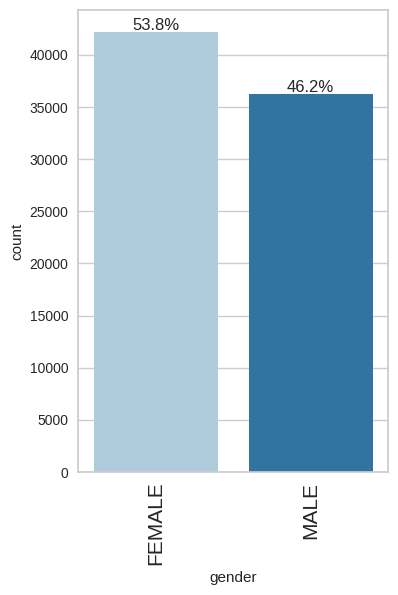

In [ ]:
labeled_barplot(ptdata, "gender", perc=True)

* In this scheduled appointment dataset 54% of the population are Female

### Top 10 facilities with most appointments

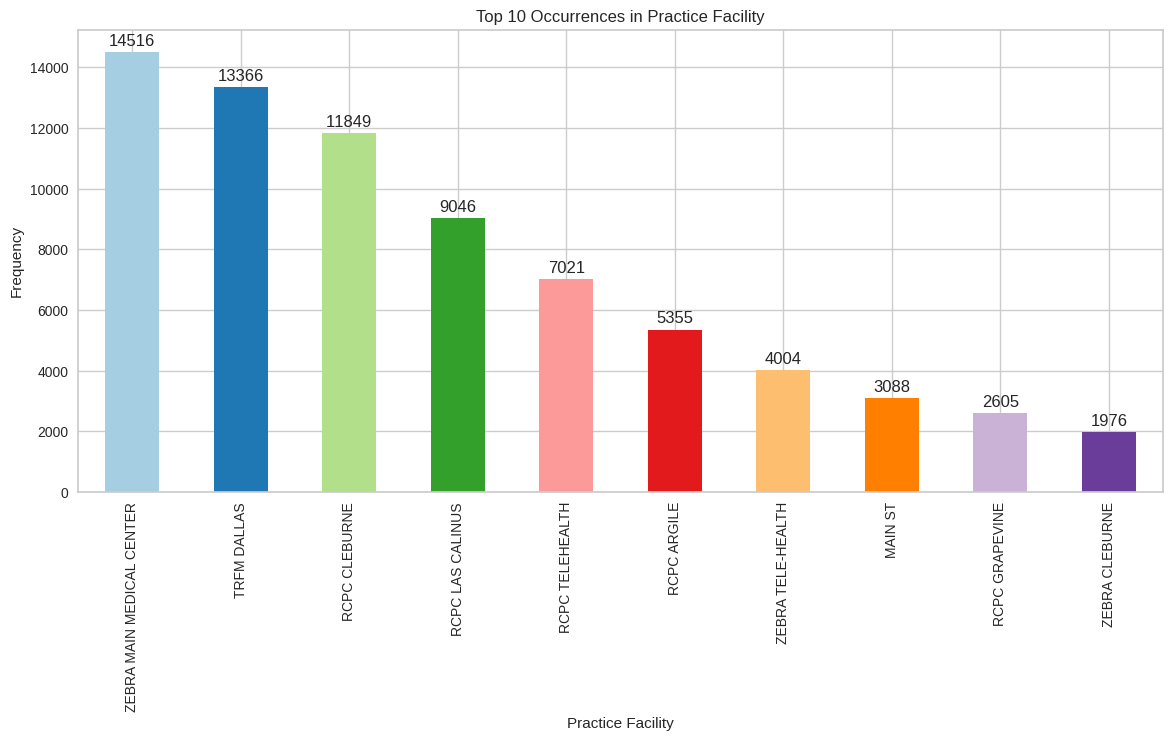

In [ ]:
# Bar Plot for Practicing Facility
top_10_bar_plot(ptdata,"facility","Practice Facility")

In this dataset the Top 3 facilities with the most of patient population are Zebra Main Medical Center, TRFM Dallas and RCPC Cleburne

### Appointments scheduled in each Practice

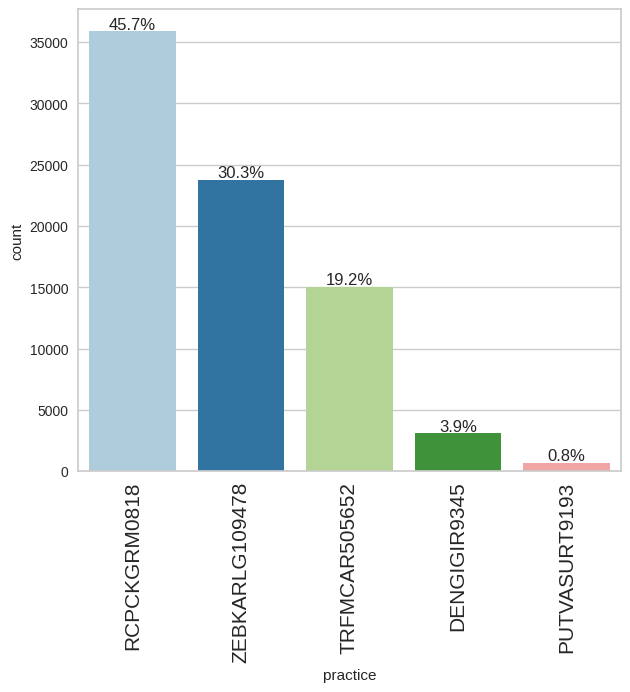

In [ ]:
labeled_barplot(ptdata, "practice", perc=True)

<font color='Navy'><b> Observation </b></font><BR> In this dataset most of the appointments are in RCPCKGRM0818 followed by ZEBKARLG109478

### Bar Plot - Patient Web Enabled

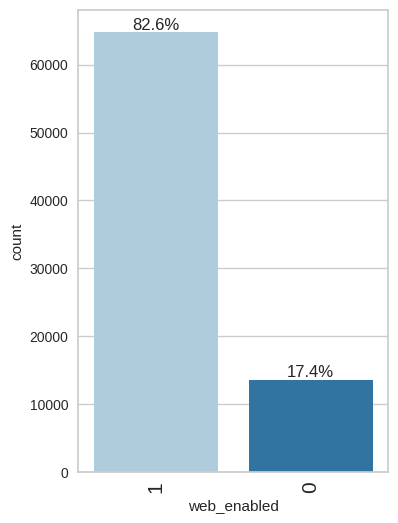

In [ ]:
labeled_barplot(ptdata, "web_enabled", perc=True)

### Bar Plot - Patient Email Registered

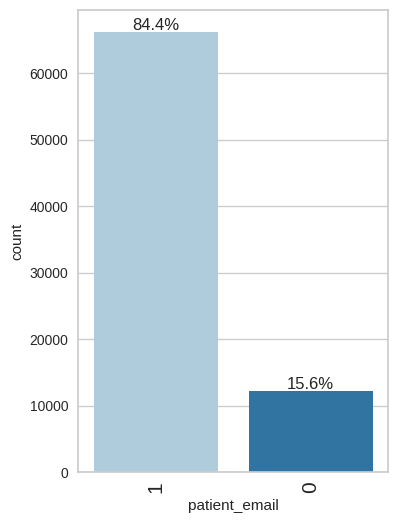

In [ ]:
labeled_barplot(ptdata, "patient_email", perc=True)

### Bar Plot - Top 10 by Visit Type

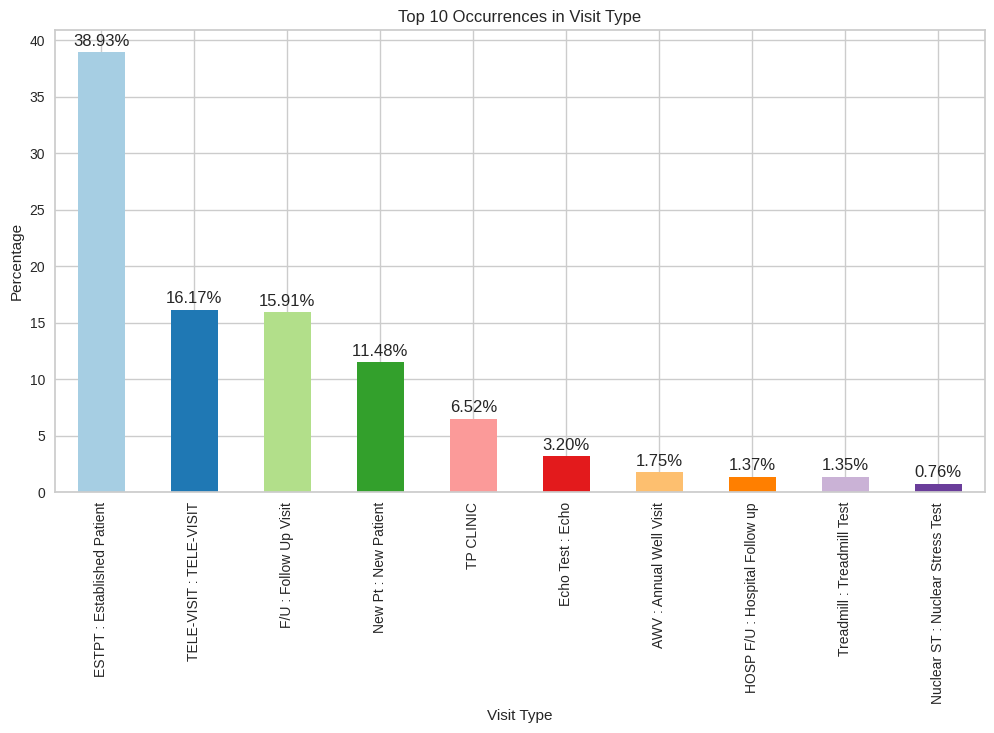

In [ ]:
top_10_bar_plot_percent(ptdata,"visit_type","Visit Type")

<font color='Navy'><b> Observation </b></font><BR>

* There is only a 11% new patient in this dataset. The healthcare institution has to make effort to increase their New Patient acquisition.

### Appointment by day of the Week

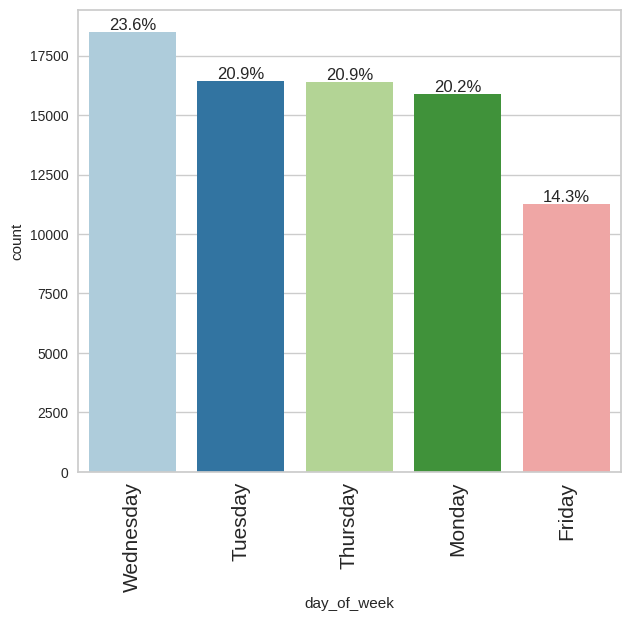

In [ ]:
labeled_barplot(ptdata, 'day_of_week', perc=True)

<font color='Navy'><b> Observation </b></font><BR>

* Wednesday leads the workday with most appointments.
* Friday has the least amount of appointments.

## Bivariate Analysis

### Top Provider with most No Shows in the dataset

In [ ]:
prov_no_show = ptdata[ptdata['visit_status'] == 0]

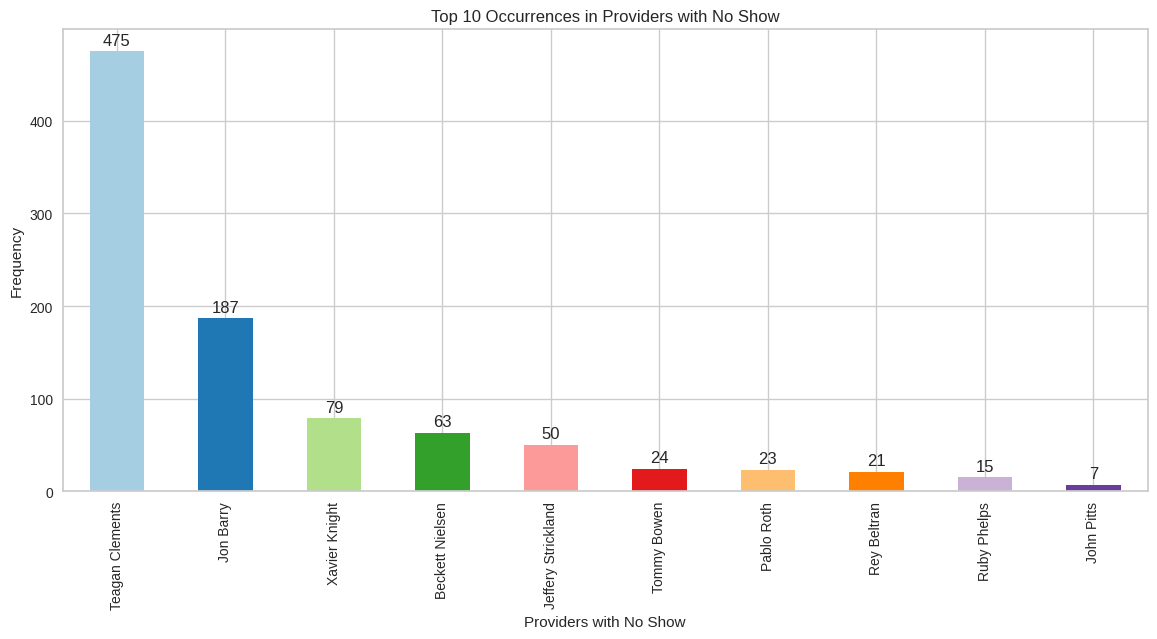

In [ ]:
top_10_bar_plot(prov_no_show, 'apt_provider','Providers with No Show')

### Top 10 Facilities with Most No Shows

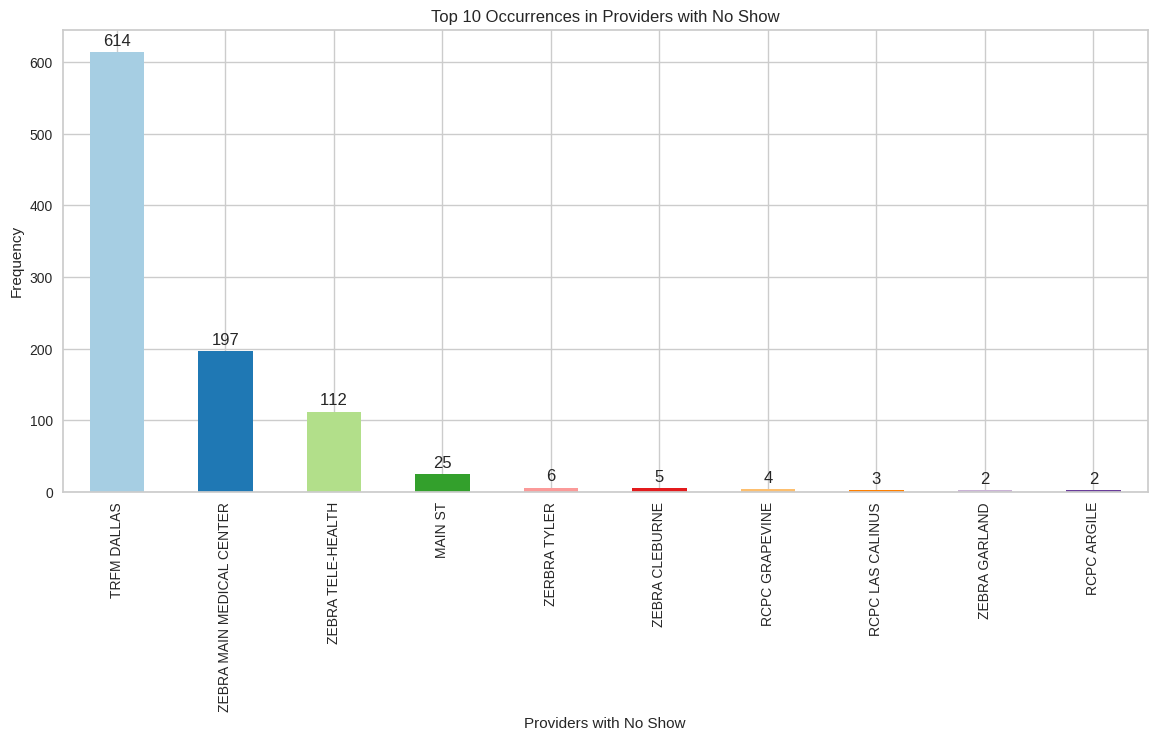

In [ ]:
top_10_bar_plot(prov_no_show, 'facility','Providers with No Show')

### No Shows by Each Day of the Week

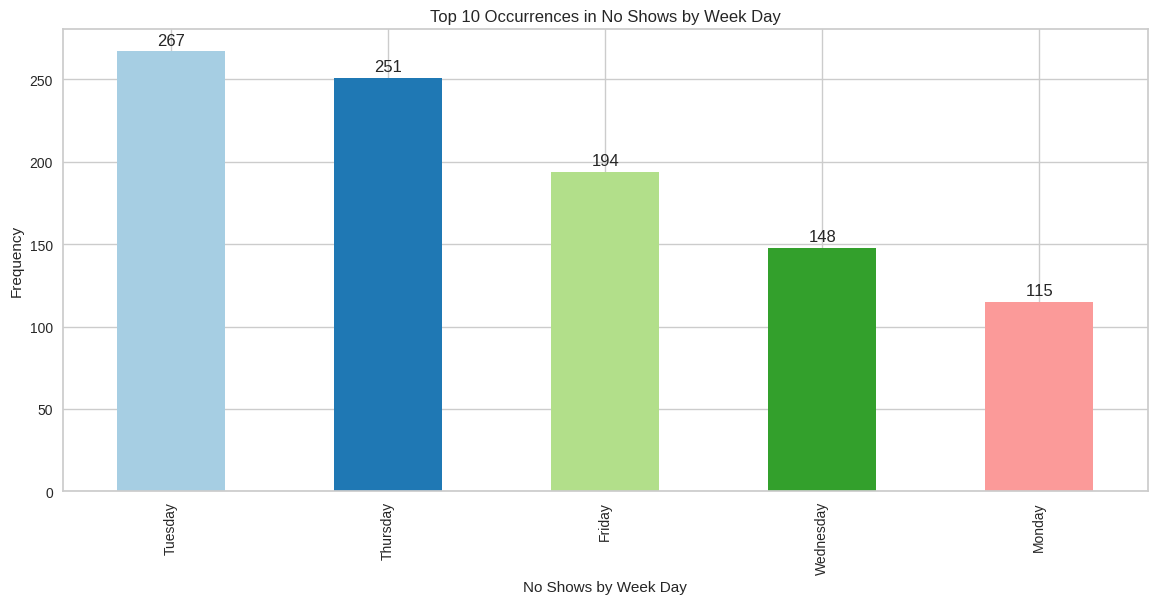

In [ ]:
top_10_bar_plot(prov_no_show, 'day_of_week','No Shows by Week Day')

### Tele-Visit Distribution Across Practice

is_televisit        0      1    All
practice                           
All             65738  12680  78418
RCPCKGRM0818    28373   7503  35876
ZEBKARLG109478  19669   4078  23747
TRFMCAR505652   14243    798  15041
DENGIGIR9345     2787    301   3088
PUTVASURT9193     666      0    666
------------------------------------------------------------------------------------------------------------------------


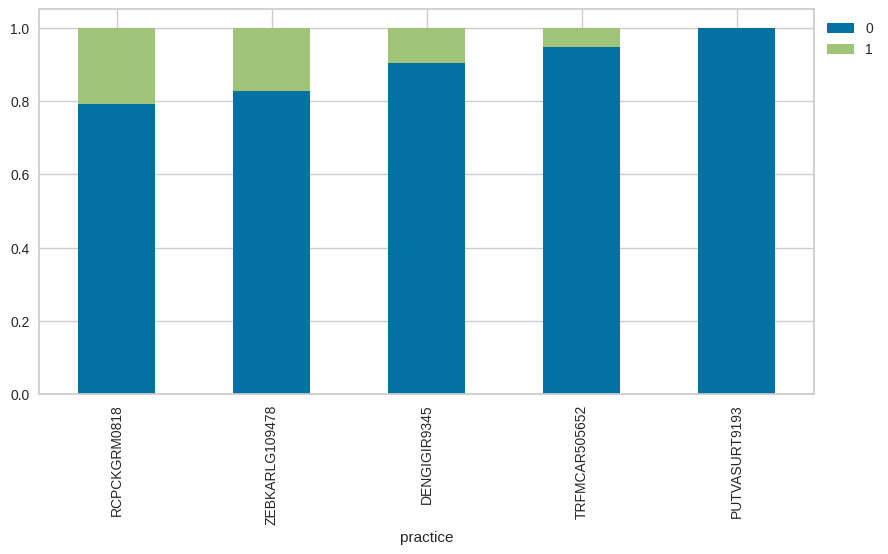

In [ ]:
stacked_barplot(ptdata, "practice", "is_televisit")

<font color='Navy'><b> Observation </b></font><BR>
* RCPCKGR0818 has the highest number of televists in this dataset.

### Gender Distribution by Each Practice

gender          FEMALE   MALE    All
practice                            
All              42205  36213  78418
RCPCKGRM0818     21028  14848  35876
ZEBKARLG109478   11337  12410  23747
TRFMCAR505652     7840   7201  15041
DENGIGIR9345      1609   1479   3088
PUTVASURT9193      391    275    666
------------------------------------------------------------------------------------------------------------------------


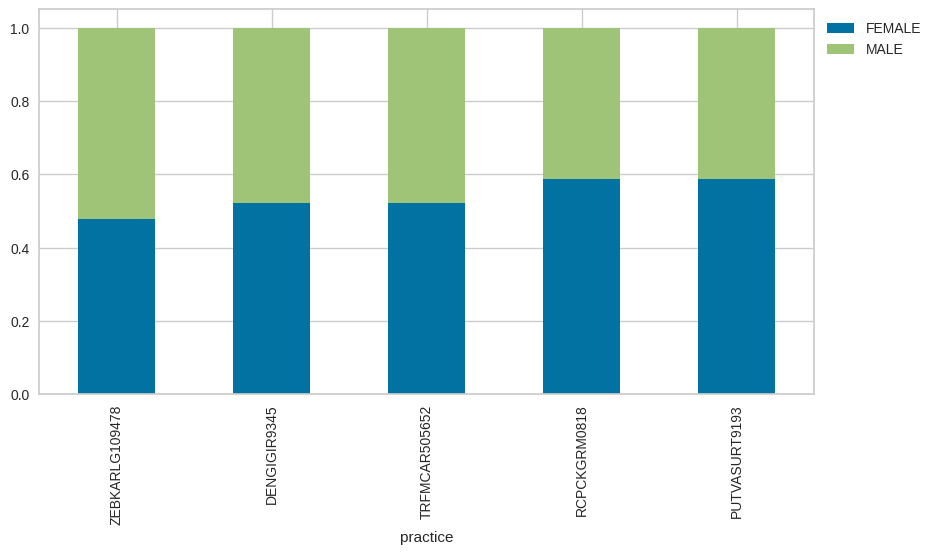

In [ ]:
stacked_barplot(ptdata, "practice", "gender")

### Top 10 Cities where Patient Come from.

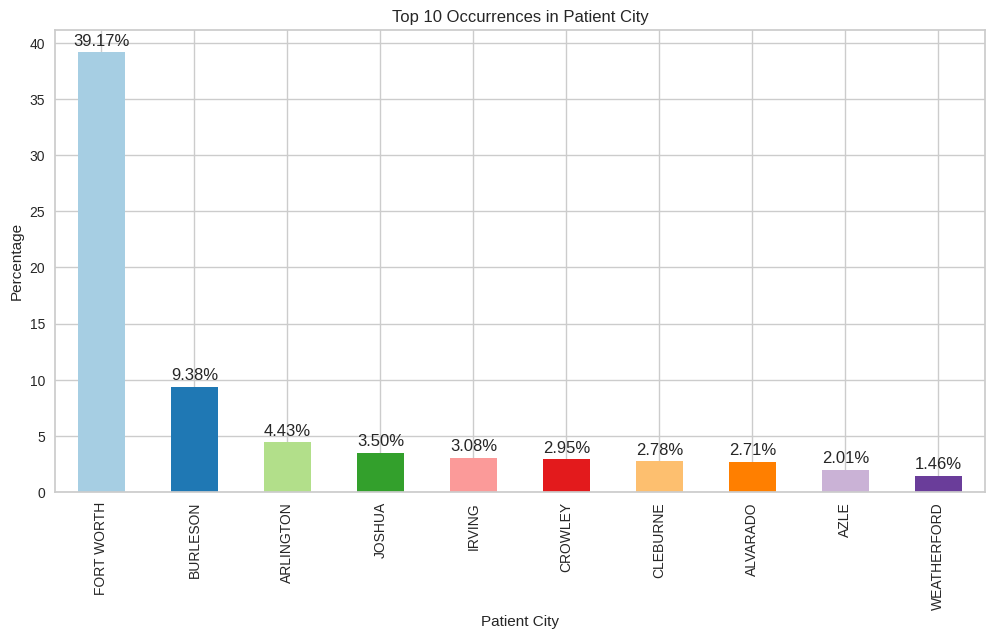

In [ ]:
#pt_city = ptdata['patient_city'].value_counts().nlargest(10)
#pt_city
#pt_city.info()
top_10_bar_plot_percent(ptdata,"patient_city","Patient City")
#labeled_barplot(pt_city, pt_city[0], perc=True)

<font color='Navy'><b> Observation </b></font><BR>
* The chart shows that most patients are from Fort Worth.


In [ ]:
ptdata.head()

,gender,insurance,patient_city,practice,facility,is_televisit,apt_createdby,visit_type,visit_status,apt_provider,patient_email,txt_enabled,voice_enabled,web_enabled,day_of_week,month,age_cat
0,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Melvin Maldonado,HOSP F/U : Hospital Follow up,1,Noelle Dennis,1,1,1,1,Wednesday,2023-10,76+
1,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Melvin Maldonado,ESTPT : Established Patient,1,Zora Ross,1,1,1,1,Wednesday,2023-08,76+
2,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Melvin Maldonado,ESTPT : Established Patient,1,Kellen Mayer,1,1,1,1,Wednesday,2023-03,76+
3,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC CLEBURNE,0,Melvin Maldonado,ESTPT : Established Patient,1,Rosalie Sawyer,1,1,1,1,Wednesday,2022-03,76+
4,MALE,Self-Pay,FORT WORTH,ZEBKARLG109478,ZEBRA MAIN MEDICAL CENTER,0,Melvin Maldonado,F/U : Follow Up Visit,1,Jon Barry,1,1,1,1,Thursday,2022-03,76+


In [ ]:
apt_date = pd.to_datetime(ptdata['apt_date'])
ptdata['month'] = apt_date.dt.to_period('M')

### Distribution of Appointment by Day of the Week with No Show Data

<Figure size 1000x600 with 0 Axes>

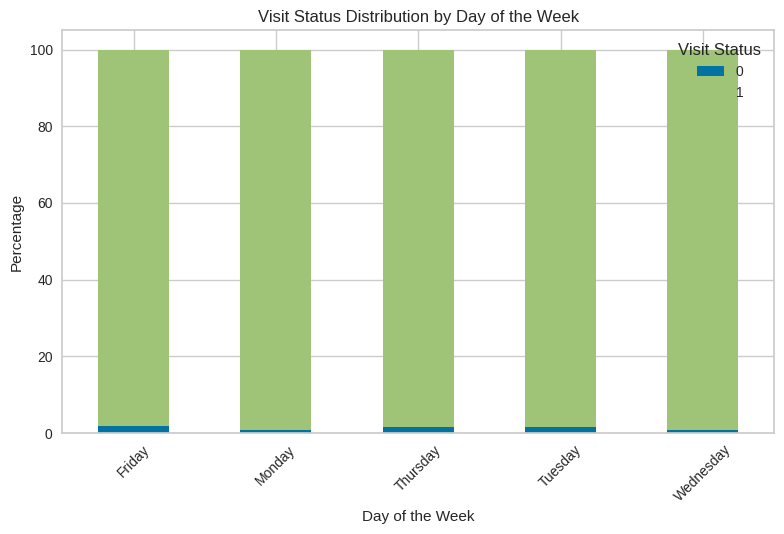

In [ ]:
# Count appointments by day of the week
appointments_by_day = ptdata['day_of_week'].value_counts()

# Calculate visit status distribution
visit_status_counts = ptdata.groupby('day_of_week')['visit_status'].value_counts().unstack(fill_value=0)
visit_status_percent = visit_status_counts.div(visit_status_counts.sum(axis=1), axis=0) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
visit_status_percent.plot(kind='bar', stacked=True)
plt.title("Visit Status Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage")
plt.legend(title="Visit Status", loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='Navy'><b> Observation </b></font><BR>


### Top 10 Insurance with appointments

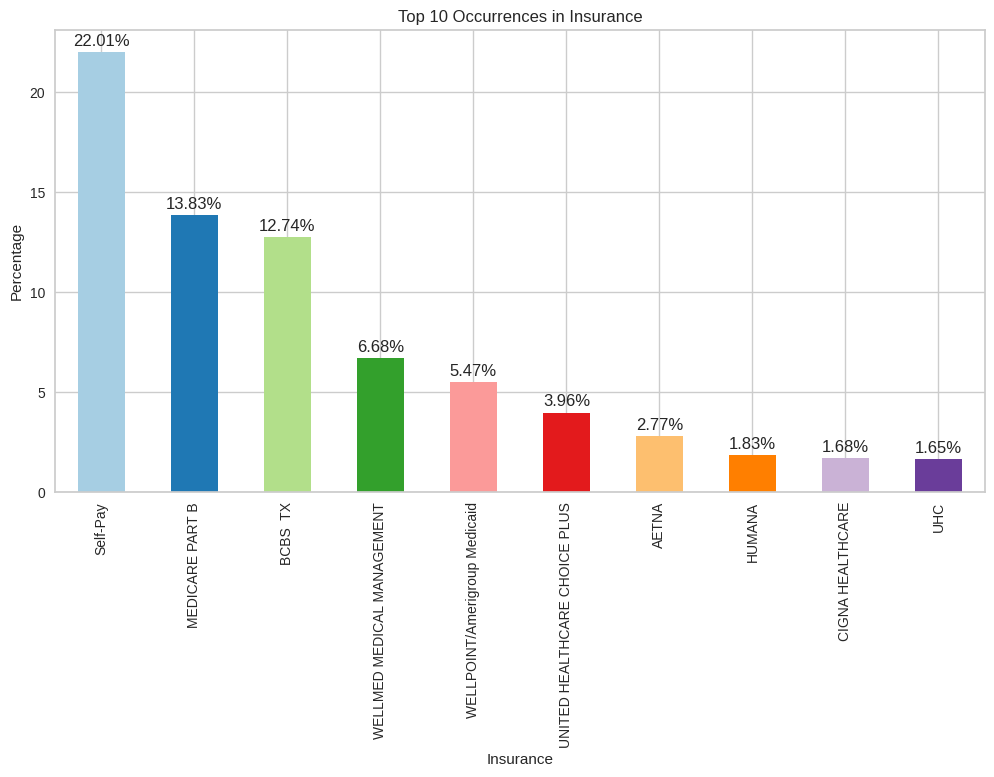

In [ ]:
#pt_insurance = ptdata['insurance'].value_counts().nlargest(10)
#pt_insurance

top_10_bar_plot_percent(ptdata,"insurance","Insurance")

 **Top 10 provider with appointments**

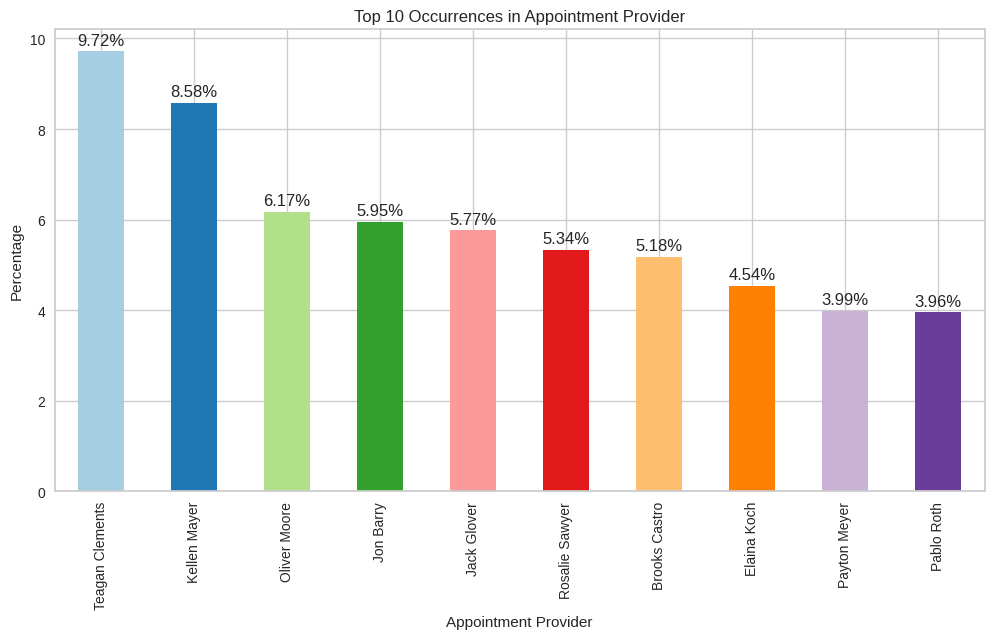

In [ ]:
#providers = ptdata['apt_provider'].value_counts().nlargest(10)
#providers
top_10_bar_plot_percent(ptdata,"apt_provider","Appointment Provider")

<font color='Navy'><b> Observation </b></font><BR>

* Teagan Clements has the highest number of Appointments in this dataset.

### Distribution of data by Age, Visit Status

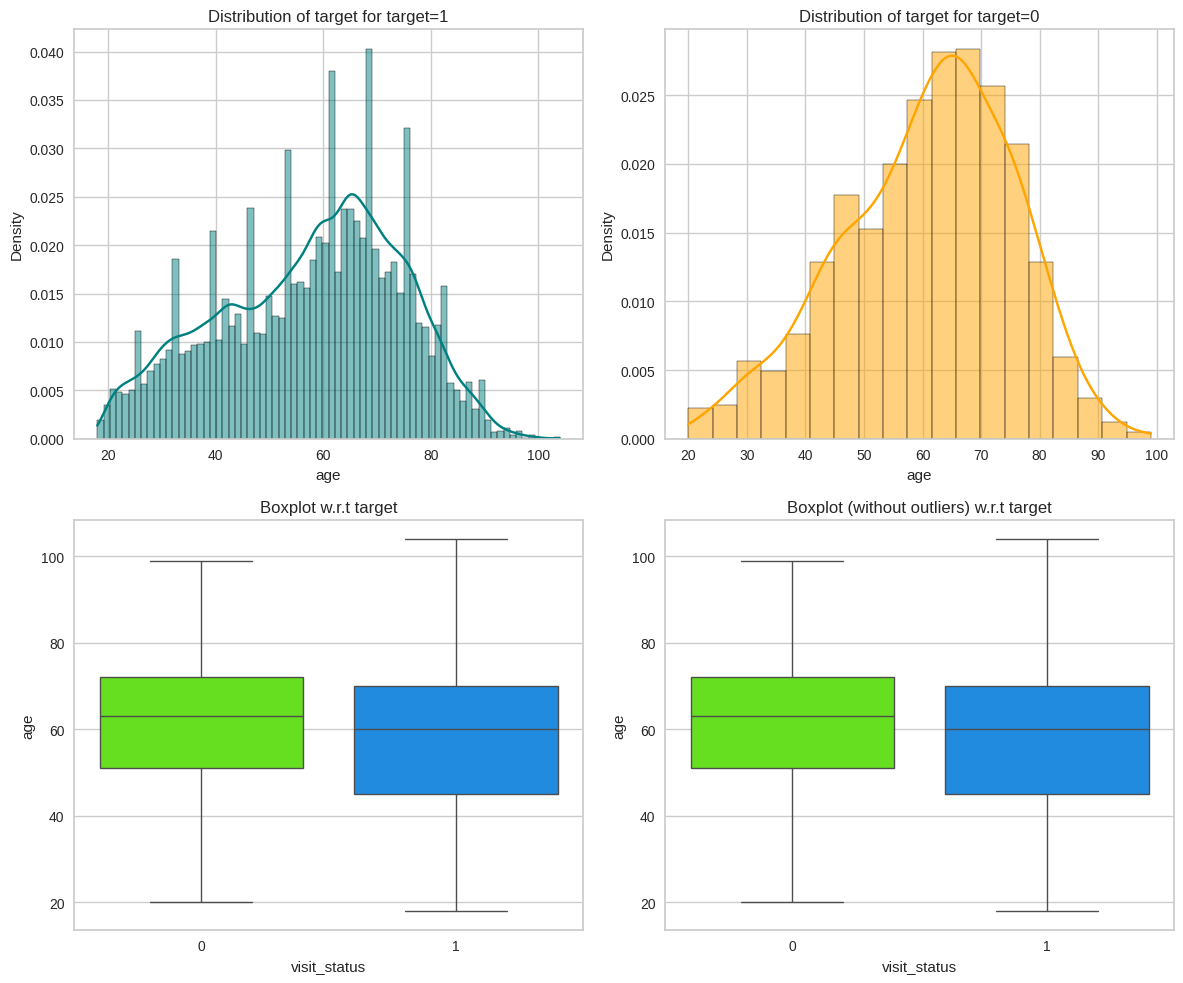

In [ ]:
distribution_plot_wrt_target(ptdata, "age", "visit_status")

For both datasets the distribution is skewed to the right.
There are not any outliers

### Appointments scheduled by Month/Year

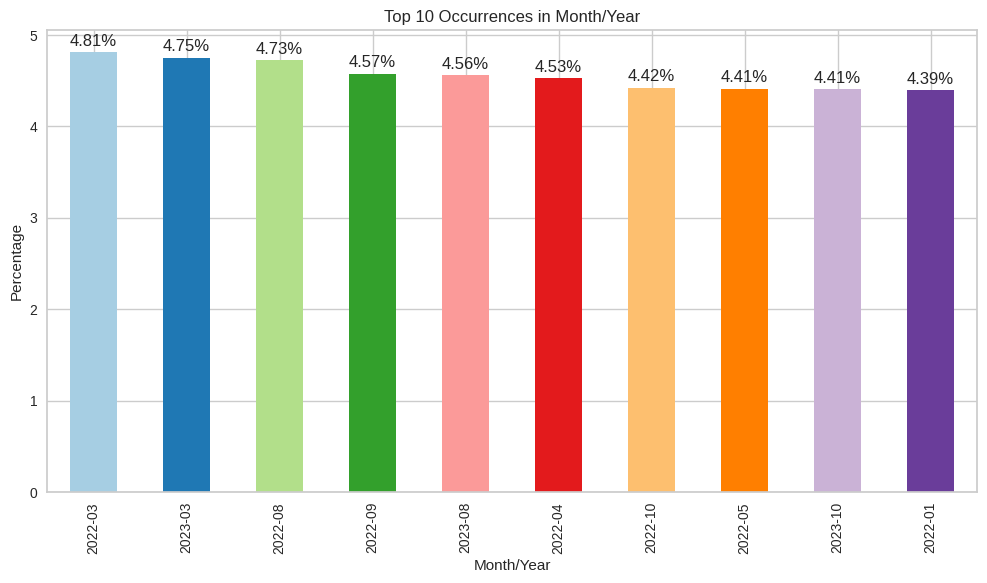

In [ ]:
top_10_bar_plot_percent(ptdata,"month","Month/Year")

<font color='Navy'><b> Observation </b></font><BR>

* August 2022 ranks 3rd on scheduled appointments
* 2022 and 2023 March has the most patient appointments.

### **Correlation**

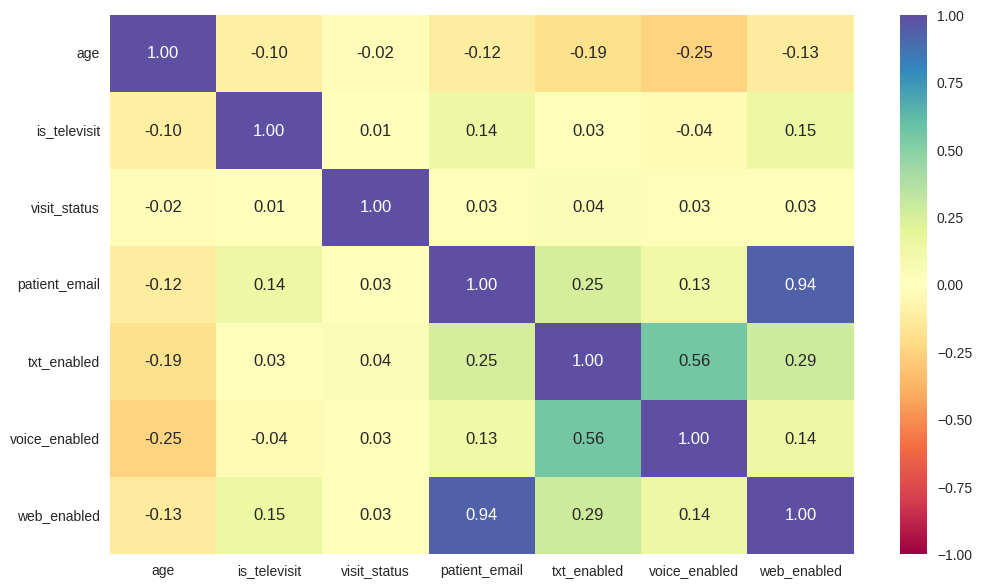

In [ ]:
# What are the attributes that have a strong correlation with each other?
cols_list = ptdata.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    ptdata[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
ptdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,78418.00000,57.72708,16.86107,18.00000,45.00000,60.00000,70.00000,104.00000
is_televisit,78418.00000,0.16170,0.36818,0.00000,0.00000,0.00000,0.00000,1.00000
visit_status,78418.00000,0.98757,0.11081,0.00000,1.00000,1.00000,1.00000,1.00000
patient_email,78418.00000,0.84446,0.36242,0.00000,1.00000,1.00000,1.00000,1.00000
txt_enabled,78418.00000,0.64034,0.47990,0.00000,0.00000,1.00000,1.00000,1.00000
voice_enabled,78418.00000,0.79733,0.40199,0.00000,1.00000,1.00000,1.00000,1.00000
web_enabled,78418.00000,0.82648,0.37870,0.00000,1.00000,1.00000,1.00000,1.00000


## Data Preprocessing

In [ ]:
# Define the bins and labels for customer age.
bins = [0, 25, 50, 75, float('inf')]
labels = ['0-25', '26-50', '51-75', '76+']

In [ ]:
# Categorize the 'Customer_Age' using cut
ptdata['age_cat'] = pd.cut(ptdata['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Dropping the Feature Customer_Age as we have categorized
ptdata = ptdata.drop(["age"], axis=1)
ptdata = ptdata.drop(["acct_no"], axis=1)
ptdata = ptdata.drop(["apt_date"], axis=1)
ptdata = ptdata.drop(["reg_date"], axis=1)
ptdata = ptdata.drop(["insurance.1"], axis=1)


In [ ]:
ptdata.head()

,gender,insurance,patient_city,practice,facility,is_televisit,apt_createdby,visit_type,visit_status,apt_provider,patient_email,txt_enabled,voice_enabled,web_enabled,day_of_week,month,age_cat
0,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Melvin Maldonado,HOSP F/U : Hospital Follow up,1,Noelle Dennis,1,1,1,1,Wednesday,2023-10,76+
1,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Melvin Maldonado,ESTPT : Established Patient,1,Zora Ross,1,1,1,1,Wednesday,2023-08,76+
2,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Melvin Maldonado,ESTPT : Established Patient,1,Kellen Mayer,1,1,1,1,Wednesday,2023-03,76+
3,MALE,Self-Pay,FORT WORTH,RCPCKGRM0818,RCPC CLEBURNE,0,Melvin Maldonado,ESTPT : Established Patient,1,Rosalie Sawyer,1,1,1,1,Wednesday,2022-03,76+
4,MALE,Self-Pay,FORT WORTH,ZEBKARLG109478,ZEBRA MAIN MEDICAL CENTER,0,Melvin Maldonado,F/U : Follow Up Visit,1,Jon Barry,1,1,1,1,Thursday,2022-03,76+


In [ ]:
# Lets convert the columns with an 'object' datatype into categorical variables
for feature in ptdata.columns: # Loop through all columns in the dataframe
    if ptdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        ptdata[feature] = pd.Categorical(ptdata[feature])# Replace strings with an integer
ptdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78418 entries, 0 to 78417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   gender         78418 non-null  category 
 1   insurance      78418 non-null  category 
 2   patient_city   78418 non-null  category 
 3   practice       78418 non-null  category 
 4   facility       78418 non-null  category 
 5   is_televisit   78418 non-null  int64    
 6   apt_createdby  78418 non-null  category 
 7   visit_type     78418 non-null  category 
 8   visit_status   78418 non-null  int64    
 9   apt_provider   78418 non-null  category 
 10  patient_email  78418 non-null  int64    
 11  txt_enabled    78418 non-null  int64    
 12  voice_enabled  78418 non-null  int64    
 13  web_enabled    78418 non-null  int64    
 14  day_of_week    78418 non-null  category 
 15  month          78418 non-null  period[M]
 16  age_cat        78418 non-null  category 
dtypes: category(

In [ ]:
ptdata['month'] = ptdata['month'].astype('category')

In [ ]:
ptdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78418 entries, 0 to 78417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   gender         78418 non-null  category
 1   insurance      78418 non-null  category
 2   patient_city   78418 non-null  category
 3   practice       78418 non-null  category
 4   facility       78418 non-null  category
 5   is_televisit   78418 non-null  int64   
 6   apt_createdby  78418 non-null  category
 7   visit_type     78418 non-null  category
 8   visit_status   78418 non-null  int64   
 9   apt_provider   78418 non-null  category
 10  patient_email  78418 non-null  int64   
 11  txt_enabled    78418 non-null  int64   
 12  voice_enabled  78418 non-null  int64   
 13  web_enabled    78418 non-null  int64   
 14  day_of_week    78418 non-null  category
 15  month          78418 non-null  category
 16  age_cat        78418 non-null  category
dtypes: category(11), int64(6)
memor

In [ ]:
ptdata.columns

Index(['gender', 'insurance', 'patient_city', 'practice', 'facility',
       'is_televisit', 'apt_createdby', 'visit_type', 'visit_status',
       'apt_provider', 'patient_email', 'txt_enabled', 'voice_enabled',
       'web_enabled', 'day_of_week', 'month', 'age_cat'],
      dtype='object')

### Splitting Dataset for the experiment and for the validating the unseen dataset

In [ ]:
data = ptdata.sample(frac=0.9, random_state=123)
data_unseen = ptdata.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (70576, 17)
Unseen Data For Predictions: (7842, 17)


### Organizing categorical columns and numerical columns

In [ ]:
categoricals = ['gender', 'insurance', 'patient_city', 'practice', 'facility',
       'is_televisit', 'apt_createdby', 'visit_type',
       'apt_provider','day_of_week', 'month', 'age_cat']

numericals = ['is_televisit', 'patient_email', 'txt_enabled', 'voice_enabled',
       'web_enabled']

## Importing pycaret libraries

In [ ]:
from pycaret.classification import *

In [ ]:
# experience1 = no preprocessing
exp1 = ClassificationExperiment()
exp1.setup(data,  target='visit_status', session_id=555, train_size=0.7, preprocess=False, categorical_features= categoricals, numeric_features=numericals)

,Description,Value
0,Session id,555
1,Target,visit_status
2,Target type,Binary
3,Original data shape,"(70576, 17)"
4,Transformed data shape,"(70576, 17)"
5,Transformed train set shape,"(49403, 17)"
6,Transformed test set shape,"(21173, 17)"
7,Numeric features,5
8,Categorical features,12


##Model Building

### Creating two Experiment Objects for Pycaret Classification

In [ ]:
top3_exp1 = exp1.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9877,0.5000,1.0000,0.9877,0.9938,0.0000,0.0000,0.0260


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
# experiment 2, with preprocessing and more!!!
exp2 = ClassificationExperiment()
exp2.setup(data, target='visit_status', session_id=555, train_size=0.7, categorical_features= categoricals, numeric_features=numericals, numeric_imputation='mean', categorical_imputation='mode' ,
           preprocess=True, normalize=True , transformation=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95,  remove_outliers=True)

,Description,Value
0,Session id,555
1,Target,visit_status
2,Target type,Binary
3,Original data shape,"(70576, 17)"
4,Transformed data shape,"(68105, 67)"
5,Transformed train set shape,"(46932, 67)"
6,Transformed test set shape,"(21173, 67)"
7,Numeric features,5
8,Categorical features,12
9,Preprocess,True


### Compare Models

In [ ]:
top3_exp2 = exp2.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9955,0.9812,0.9995,0.9960,0.9977,0.7849,0.7976,12.5620
rf,Random Forest Classifier,0.9950,0.9650,0.9992,0.9958,0.9975,0.7615,0.7727,5.8240
gbc,Gradient Boosting Classifier,0.9949,0.9679,0.9988,0.9960,0.9974,0.7610,0.7696,8.1030
xgboost,Extreme Gradient Boosting,0.9949,0.9783,0.9989,0.9959,0.9974,0.7587,0.7678,4.2160
lightgbm,Light Gradient Boosting Machine,0.9943,0.9701,0.9988,0.9955,0.9971,0.7316,0.7419,6.6680
ada,Ada Boost Classifier,0.9937,0.9491,0.9996,0.9941,0.9968,0.6687,0.6998,4.6370
dt,Decision Tree Classifier,0.9933,0.8704,0.9965,0.9968,0.9966,0.7294,0.7302,3.6120
et,Extra Trees Classifier,0.9928,0.9516,0.9990,0.9938,0.9964,0.6256,0.6505,6.1120
lr,Logistic Regression,0.9926,0.9662,0.9995,0.9930,0.9963,0.5767,0.6190,4.0460
svm,SVM - Linear Kernel,0.9924,0.9693,0.9985,0.9938,0.9961,0.6063,0.6277,3.8160


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

###Create Model

In [ ]:
catboost = exp2.create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9949,0.9823,0.9990,0.9959,0.9974,0.7638,0.7716
1,0.9943,0.9677,0.9998,0.9945,0.9971,0.7057,0.7336
2,0.9962,0.9958,0.9994,0.9967,0.9981,0.8238,0.8298
3,0.9947,0.9816,0.9998,0.9949,0.9973,0.7322,0.7556
4,0.9960,0.9907,0.9992,0.9967,0.9980,0.8162,0.8212
5,0.9947,0.9852,0.9994,0.9953,0.9973,0.7425,0.7575
6,0.9966,0.9690,1.0000,0.9965,0.9983,0.8364,0.8478
7,0.9966,0.9850,0.9998,0.9967,0.9983,0.8394,0.8480
8,0.9960,0.9696,0.9990,0.9969,0.9980,0.8194,0.8228


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
catboost

### Plot Model

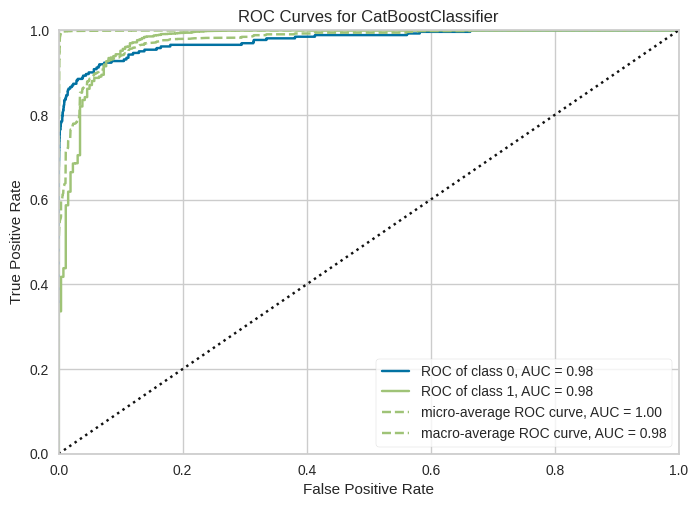

In [ ]:
exp2.plot_model(catboost, plot = 'auc')

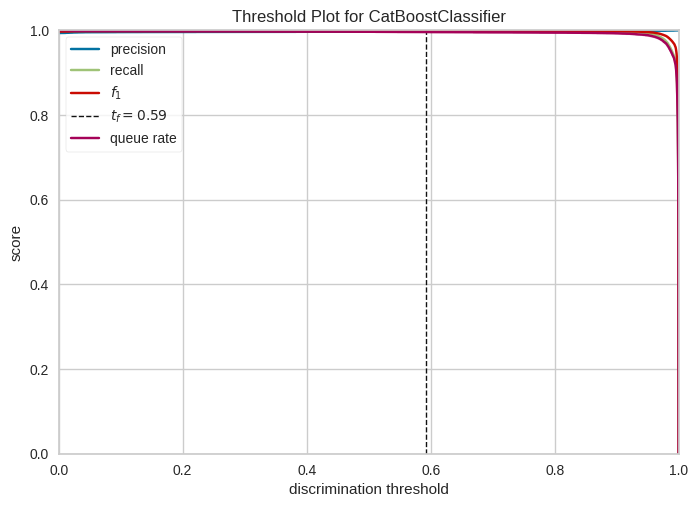

In [ ]:
exp2.plot_model(catboost, plot = 'threshold')

In [ ]:
exp2.plot_model(catboost, plot = 'pr')

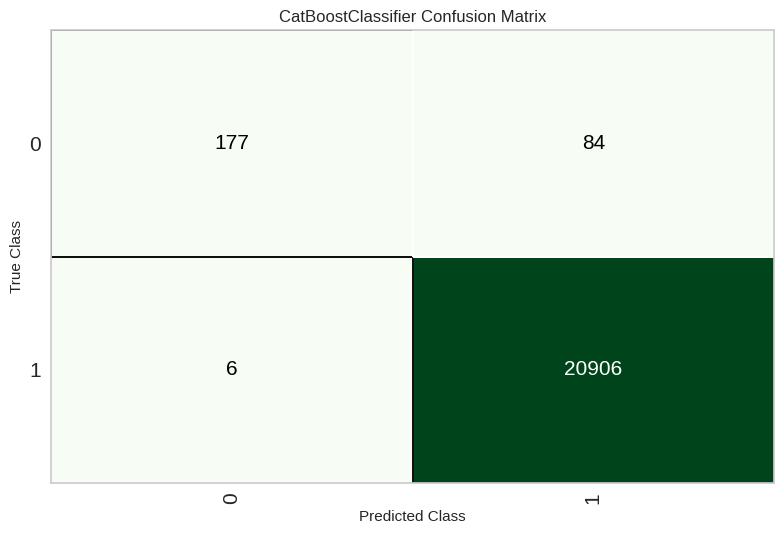

In [ ]:
exp2.plot_model(catboost, plot = 'confusion_matrix')

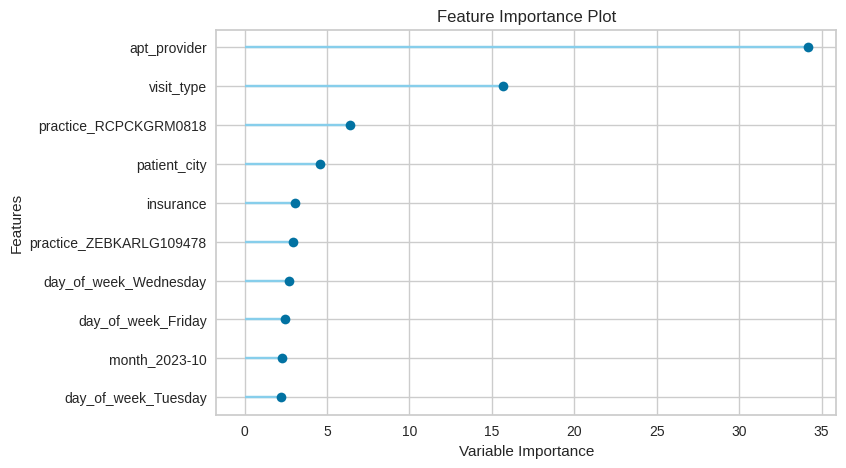

In [ ]:
exp2.plot_model(catboost, plot = 'feature')


### Final Model

In [ ]:
final_model = exp2.finalize_model(catboost)

In [ ]:
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['is_televisit', 'patient_email',
                                             'txt_enabled', 'voice_enabled',
                                             'web_enabled'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Transfor...
                ('transformation',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=PowerTransformer(copy=True,
                                                                 method='yeo-johnson',
                                                                 standardize=False))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x7f87be5a3520>)],
         verbose=False)

### Predicting Y values for the unseen data

In [ ]:
unseen_predictions = exp2.predict_model(final_model, data=data_unseen)
unseen_predictions.tail(5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9948,0.9669,0.9997,0.9950,0.9974,0.7577,0.7765


,gender,insurance,patient_city,practice,facility,is_televisit,apt_createdby,visit_type,apt_provider,patient_email,txt_enabled,voice_enabled,web_enabled,day_of_week,month,age_cat,visit_status,prediction_label,prediction_score
7837,FEMALE,SELF PAY - NO INSURANCE,WATAUGA,RCPCKGRM0818,RCPC ARGILE,0,Robin Yang,New Pt : New Patient,Elaina Koch,0,1,1,0,Thursday,2023-11,26-50,1,1,0.99990
7838,MALE,MCTL,HUMBLE,ZEBKARLG109478,ZEBRA MAIN MEDICAL CENTER,0,Robin Yang,TP CLINIC,Oliver Moore,1,0,1,0,Monday,2023-11,26-50,1,1,0.99950
7839,MALE,BCBS TX,FORT WORTH,RCPCKGRM0818,RCPC LAS CALINUS,0,Robin Yang,New Pt : New Patient,Zev Hogan,1,1,1,0,Friday,2023-12,26-50,1,1,0.99970
7840,FEMALE,BCBS FEDERAL EMPLOYEE,ARLINGTON,ZEBKARLG109478,ZERBRA TYLER,0,Robin Yang,New Pt : New Patient,Rey Beltran,1,0,1,1,Wednesday,2023-12,51-75,1,1,0.99850
7841,MALE,MCTL,MONAHANS,ZEBKARLG109478,ZEBRA MAIN MEDICAL CENTER,0,Robin Yang,TP CLINIC,Oliver Moore,0,0,1,0,Tuesday,2023-12,51-75,1,1,0.99940


In [ ]:
filtered_data = unseen_predictions[unseen_predictions['prediction_label'] == 0]
filtered_data.head(5)

,gender,insurance,patient_city,practice,facility,is_televisit,apt_createdby,visit_type,apt_provider,patient_email,txt_enabled,voice_enabled,web_enabled,day_of_week,month,age_cat,visit_status,prediction_label,prediction_score
168,MALE,BOON CHAPMAN,WEATHERFORD,TRFMCAR505652,TRFM DALLAS,0,Jazmine Portillo,DNU PROC : Procedure,Teagan Clements,1,1,1,1,Tuesday,2022-08,51-75,0,0,0.96680
618,MALE,MEDICARE PART B,FORT WORTH,TRFMCAR505652,TRFM DALLAS,0,Jenna Raymond,DNU PROC : Procedure,Teagan Clements,1,1,1,1,Thursday,2023-04,76+,0,0,0.97080
847,MALE,MEDICARE PART B,ALVARADO,TRFMCAR505652,TRFM DALLAS,0,Jenna Raymond,DNU PROC : Procedure,Xavier Knight,0,0,1,0,Wednesday,2022-03,76+,0,0,0.94580
1013,MALE,HUMANA INC.,FORT WORTH,TRFMCAR505652,TRFM DALLAS,0,Katie Luna,DNU PROC : Procedure,Teagan Clements,1,0,0,1,Thursday,2022-12,51-75,0,0,0.97850
1017,MALE,United HealthCare,ARLINGTON,TRFMCAR505652,TRFM DALLAS,0,Katie Luna,DNU PROC : Procedure,Teagan Clements,0,0,0,0,Monday,2023-09,76+,0,0,0.89040


## Conclusions and Recommendation

* Attract more new patients to the business. Having 30+ providers and only 11%  new patient visits is not sustainable in the long term.
* Predict your no show patients, call in person and remind the patient to show up for appointment.
* Also double book the slots for the patients that are predicted to no show. Although you call and remind, there is still a chance that patient may not show up.
* Analyze the Patient City and you locations, see where you could open a new clinic for your expansion of your business.
* Patient City will also help you where you should market your services.
